In [16]:
from matplotlib import pyplot as plt
import pandas as pd
import os
from matplotlib.dates import DateFormatter
import matplotlib as mpl
import numpy as np

In [17]:
DATASET=-1

In [18]:
datasets = [f for f in os.listdir(
    'data/') if os.path.isfile(os.path.join('data', f))]

datasets.sort()
df = pd.read_csv(os.path.join('data', datasets[DATASET]))

In [19]:
MAX_POINTS=300
MAX_HOURS=12
df=df[df['timestamp'].max()-df['timestamp']<=MAX_HOURS*3600e9]
print(f'Original length={len(df)}')
if len(df) > MAX_POINTS:
    rows_per_group = len(df) // MAX_POINTS
    df['group'] = df.index // rows_per_group
    df = df.groupby('group').agg({
        'mean_amplitude': 'max',
        'timestamp': lambda x: x.iloc[np.argmax(df.loc[x.index, 'mean_amplitude'])]
    }).reset_index(drop=True)
    df.drop(columns='group', inplace=True, errors='ignore')
df['datetime'] = pd.to_datetime(df['timestamp']+1*3600*1e9, unit='ns')

Original length=679


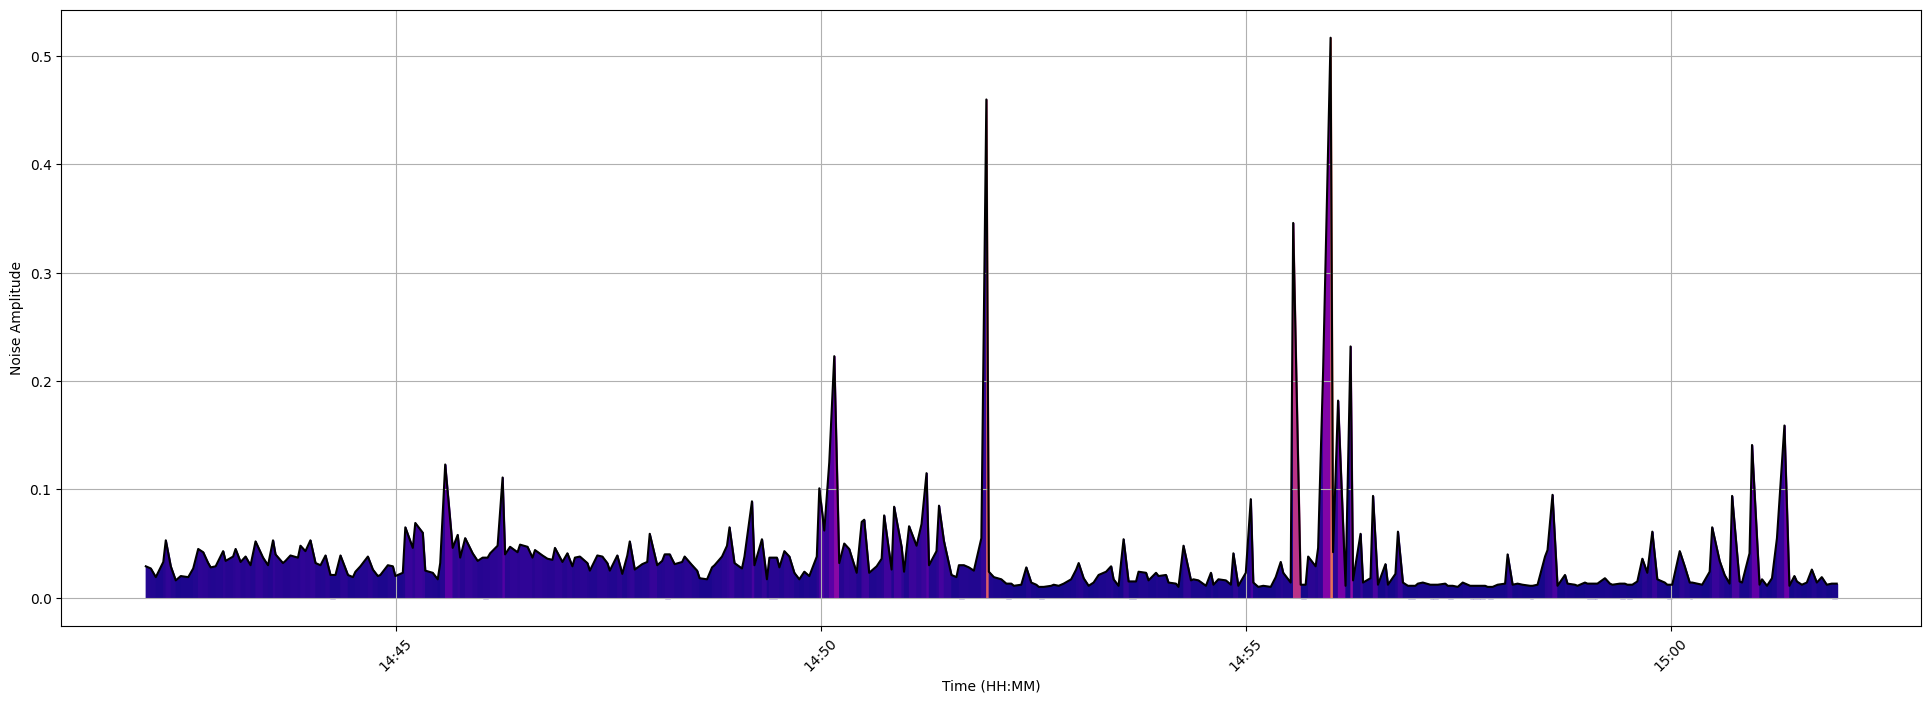

In [20]:
fig, ax = plt.subplots()
colourmap = mpl.colormaps['plasma']

ax.plot(df['datetime'], df['mean_amplitude'], label='Noise', c='black')

normalize = mpl.colors.Normalize(vmin=0, vmax=.8)
for i in range(len(df) - 1):
    plt.fill_between([df['datetime'][i], df['datetime'][i+1]],
                     [df['mean_amplitude'][i], df['mean_amplitude'][i+1]],
                     color=colourmap(normalize(df['mean_amplitude'][i]))
                     ,alpha=1)

plt.gca().xaxis.set_major_formatter(DateFormatter('%H:%M'))
fig.set_size_inches(24, 8)
plt.xlabel("Time (HH:MM)")
plt.ylabel("Noise Amplitude")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
fig.savefig('plot.jpg', format='jpg', bbox_inches='tight', pad_inches=0 )